In [73]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("processed\data_processed_final.csv")

# Función para obtener el test de Dickey-Fuller para la serie de tiempo de cada jugador
def test_stationarity(player):
    player_data = df[df["Player"] == player]
    player_data = player_data.set_index("Fecha")
    player_data.index = pd.to_datetime(player_data.index)
    player_data = player_data["last_performance"]
    adf = adfuller(player_data)
    if adf[1] < 0.05:
        print(f"La serie de tiempo es estacionaria con un p-valor de {adf[1]}")
    else:
        print(f"La serie de tiempo no es estacionaria con un p-valor de {adf[1]}")

def decomposition_with_acf_pacf(player):
    # Filtrar datos del jugador
    player_data = df[df["Player"] == player]
    player_data = player_data.set_index("Fecha")
    player_data.index = pd.to_datetime(player_data.index)
    player_data = player_data["last_performance"]
    
    # Crear descomposiciones
    decomposition_weekly = seasonal_decompose(player_data, period=7)
    decomposition_monthly = seasonal_decompose(player_data, period=30)
    
    # Descomposición semanal: componente estacional
    decomposition_weekly.plot()
    plt.show()
    
    # Descomposición mensual: componente estacional
    decomposition_monthly.plot()
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 2 filas, 2 columnas
    # Gráfico ACF
    plot_acf(player_data, lags=30, ax=axes[0])
    axes[0].set_title("Autocorrelation (ACF)")
    
    # Gráfico PACF
    plot_pacf(player_data, lags=30, ax=axes[1])
    axes[1].set_title("Partial Autocorrelation (PACF)")
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()



In [75]:
for player in df["Player"].unique():
    print(f'-------------------{player}-------------------')
    test_stationarity(player)

-------------------Ferran-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0026095474934785187
-------------------Gerard Moreno-------------------
La serie de tiempo es estacionaria con un p-valor de 0.003555918253853182
-------------------Griezmann-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0001882580844833009
-------------------Koundé-------------------
La serie de tiempo es estacionaria con un p-valor de 0.00010951481266284167
-------------------Kubo-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0018424663164316947
-------------------Lamine Yamal-------------------
La serie de tiempo es estacionaria con un p-valor de 0.000603938010507168
-------------------Lewandowski-------------------
La serie de tiempo es estacionaria con un p-valor de 0.00045048865976980305
-------------------Miguel Gutiérrez-------------------
La serie de tiempo es estacionaria con un p-valor de 0.014605832492917052
------------

-------------------Ferran-------------------


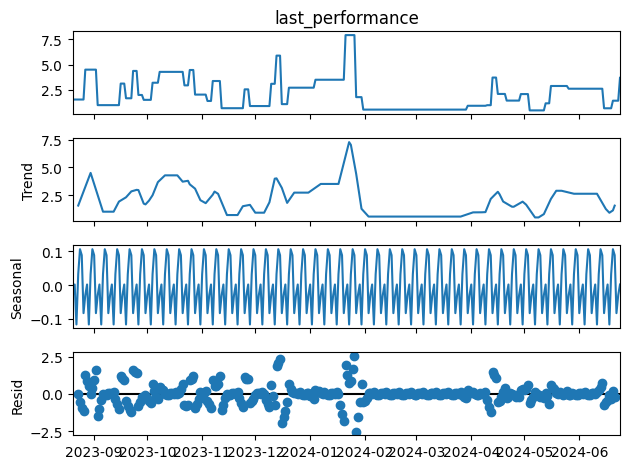

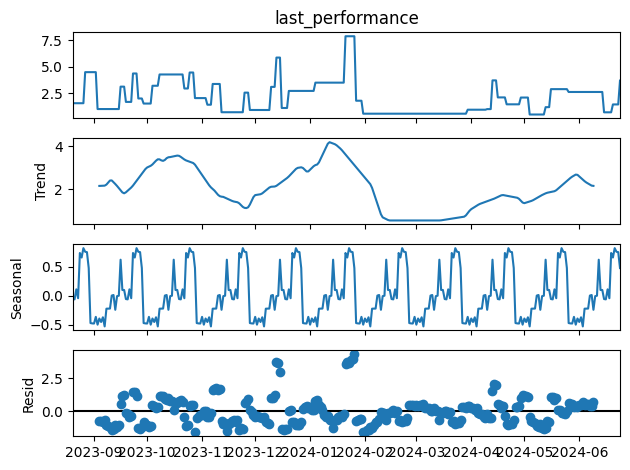

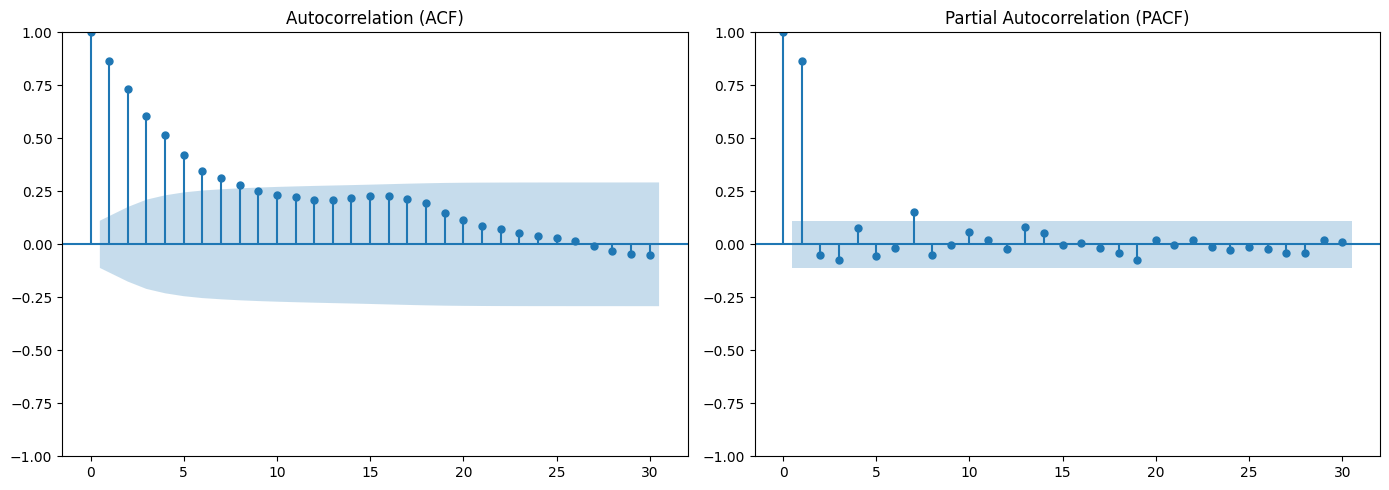

-------------------Gerard Moreno-------------------


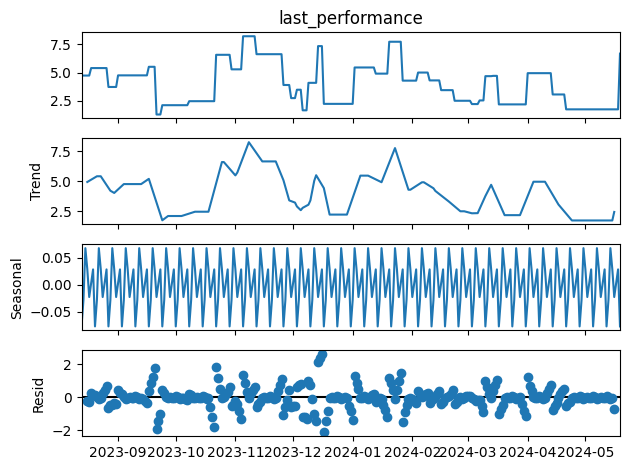

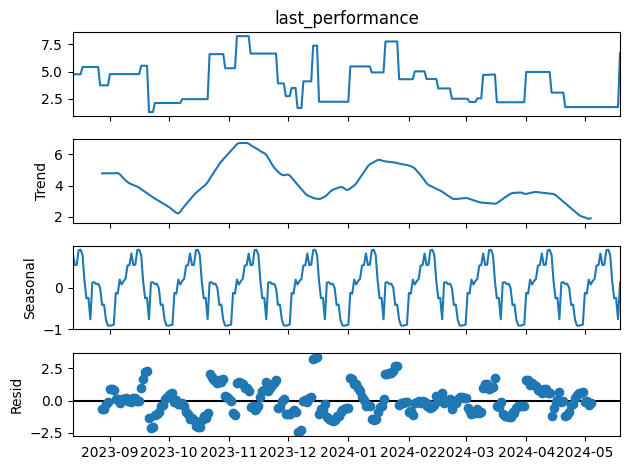

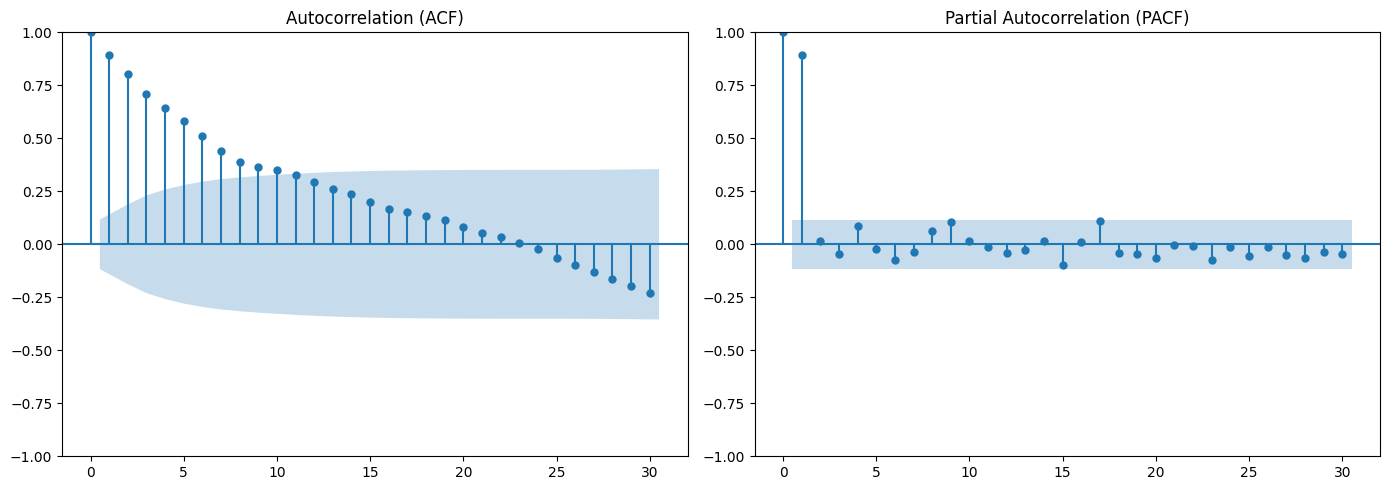

-------------------Griezmann-------------------


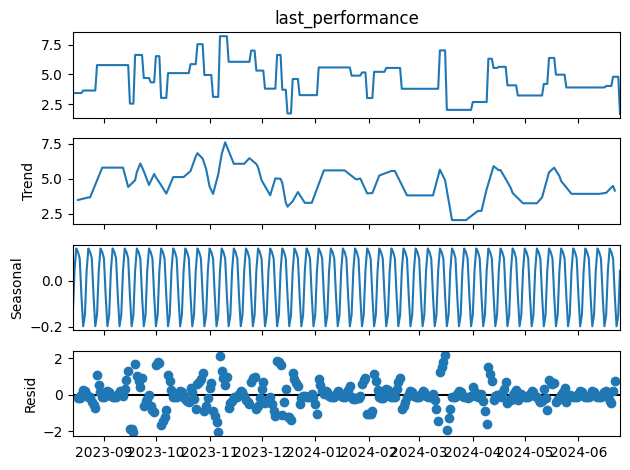

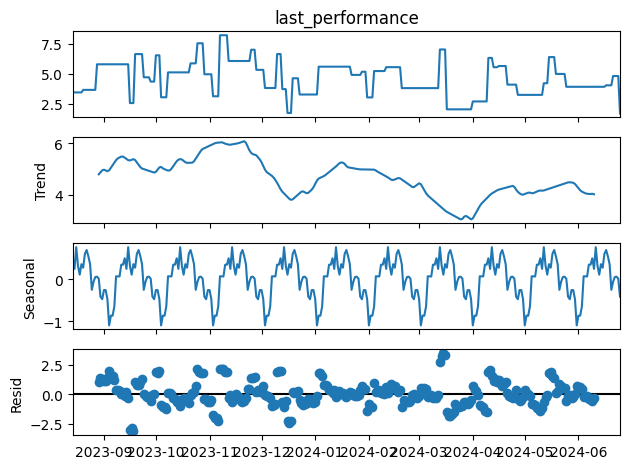

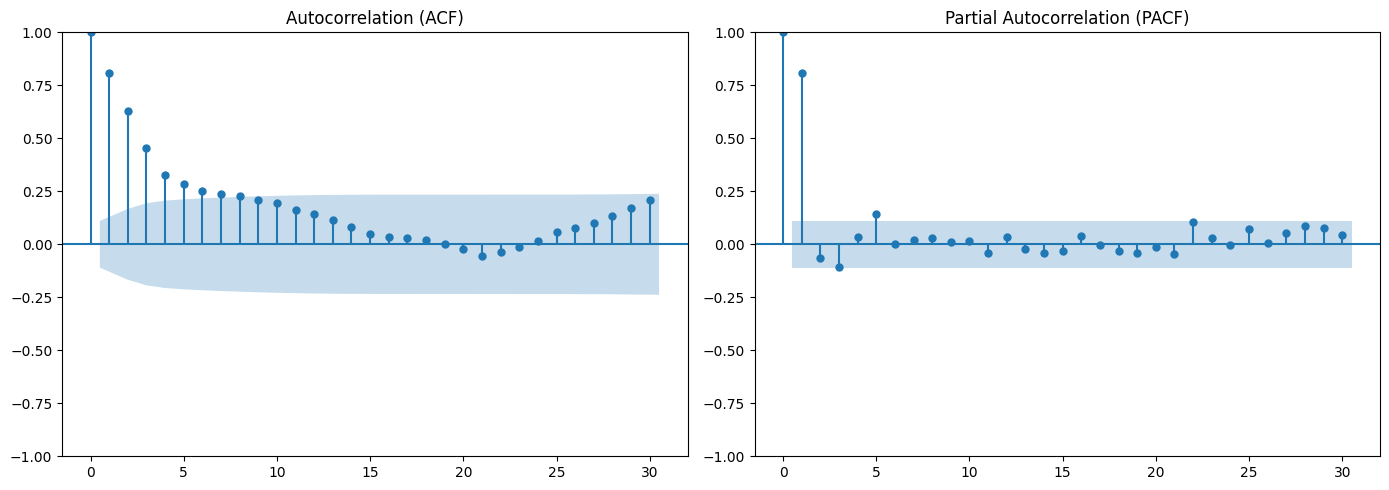

-------------------Koundé-------------------


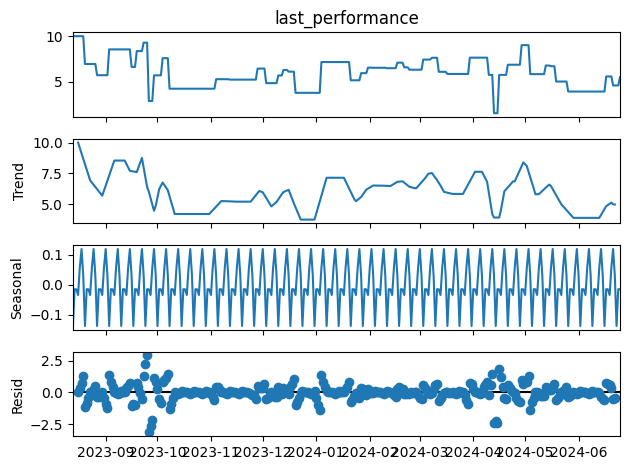

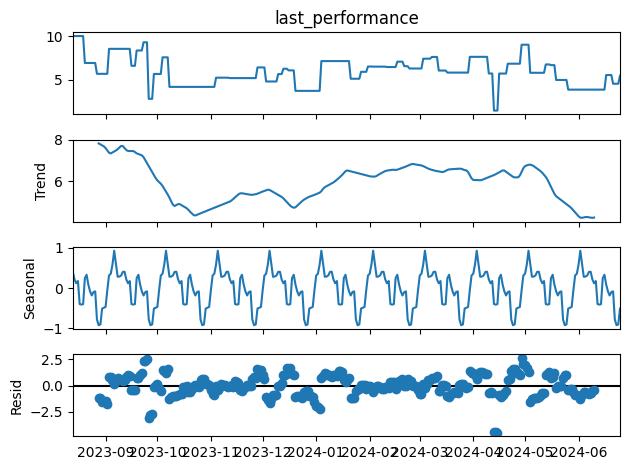

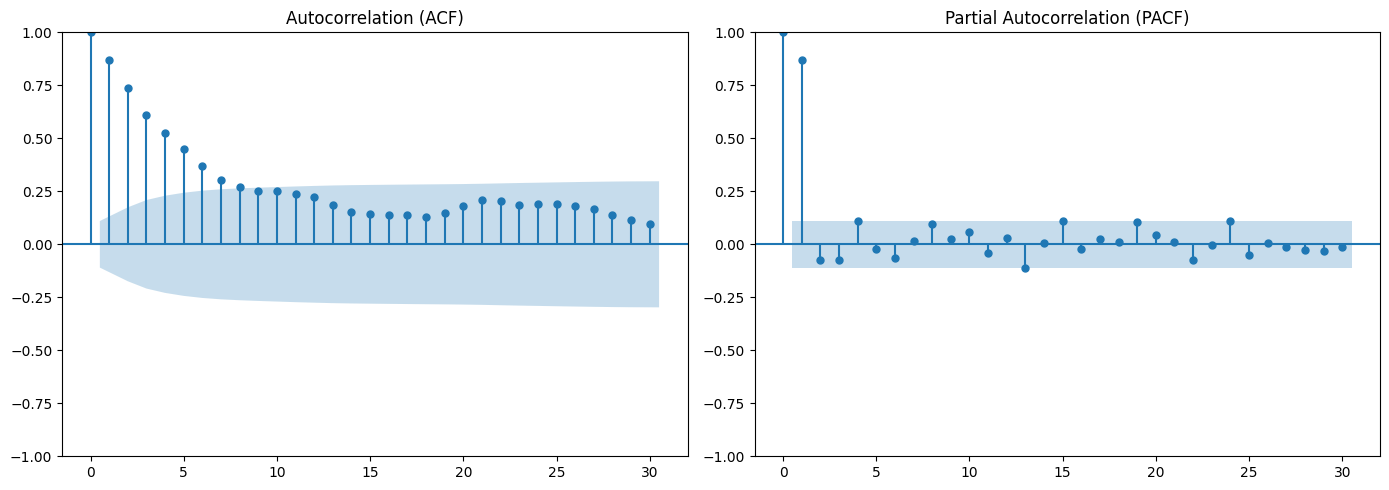

-------------------Kubo-------------------


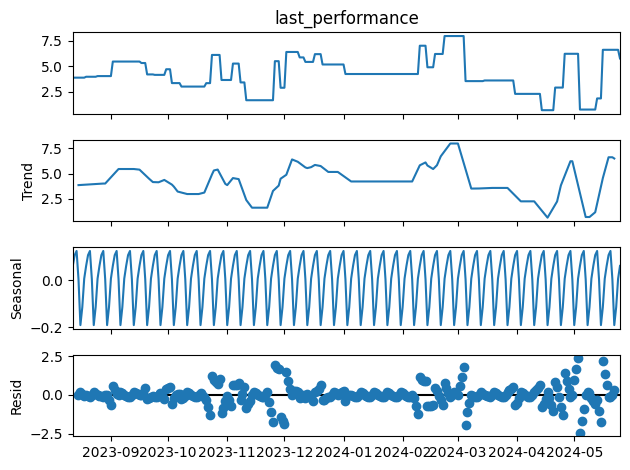

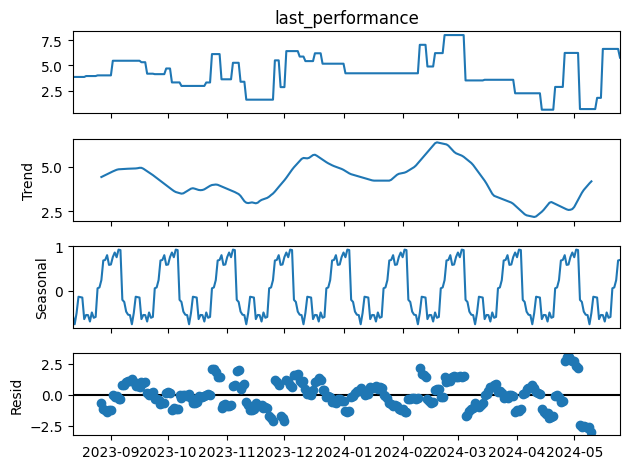

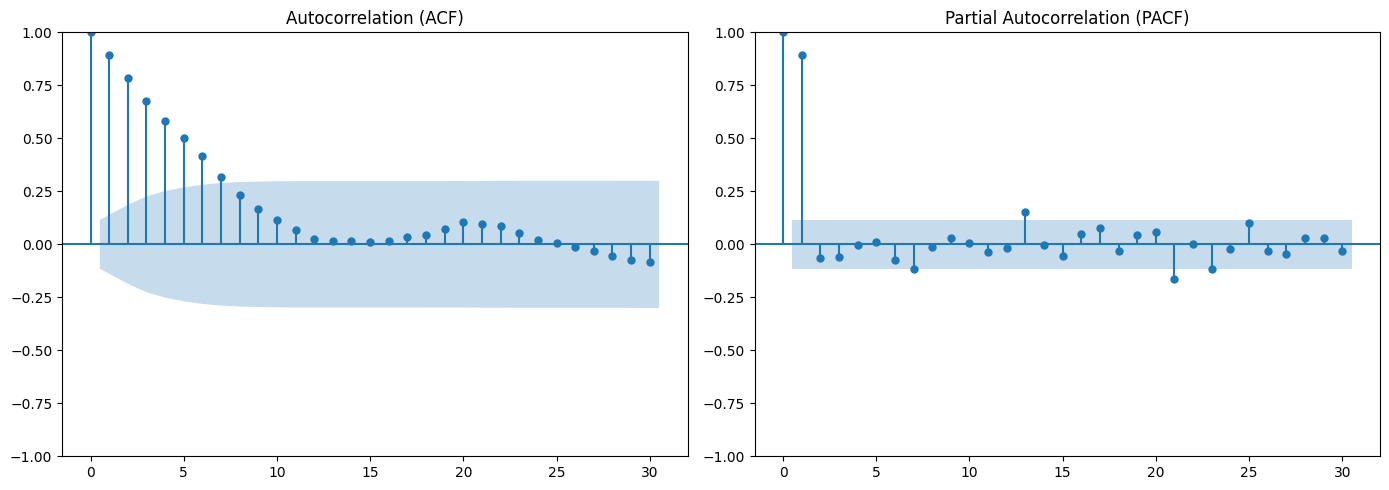

-------------------Lamine Yamal-------------------


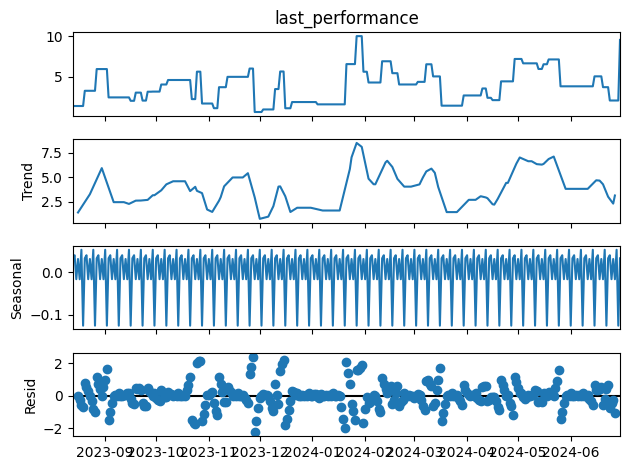

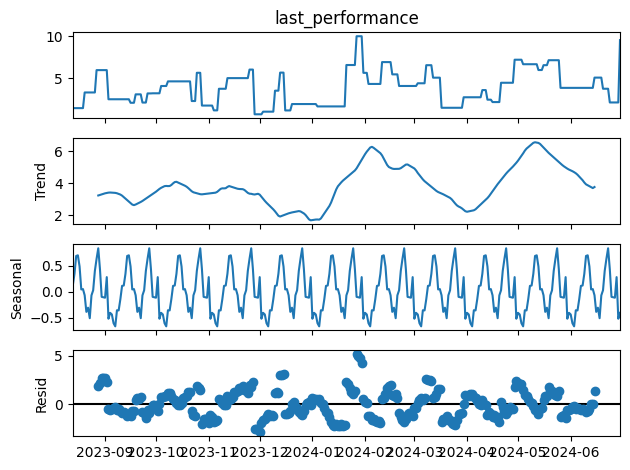

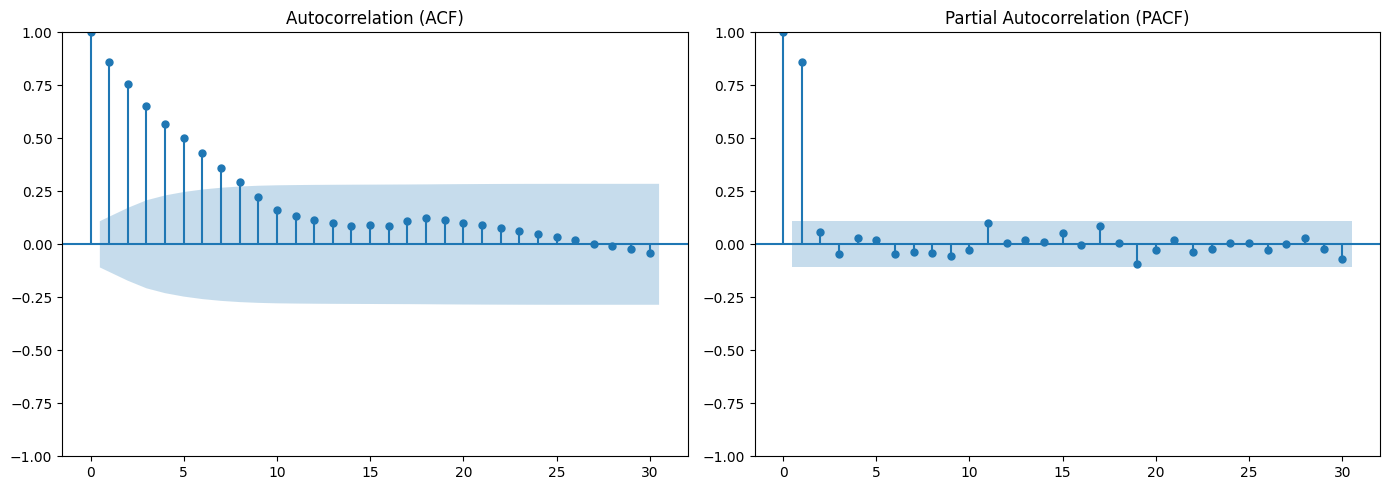

-------------------Lewandowski-------------------


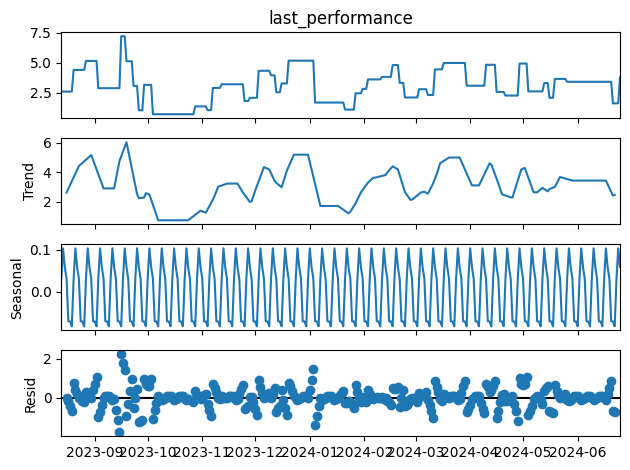

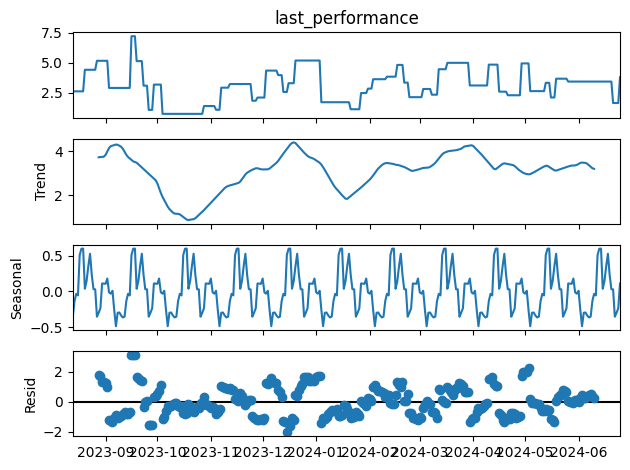

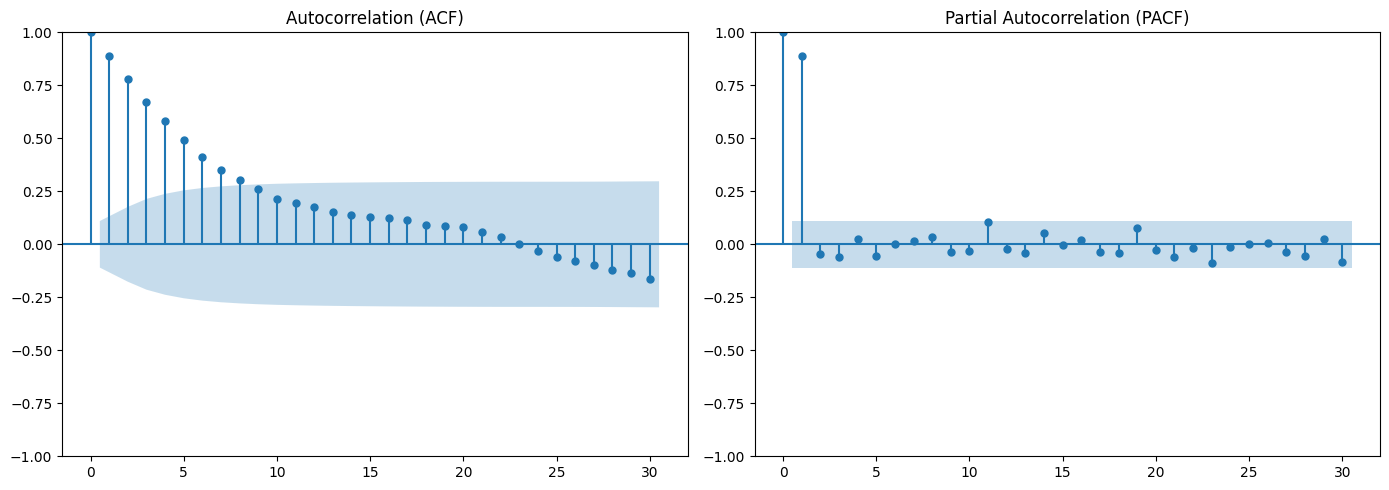

-------------------Miguel Gutiérrez-------------------


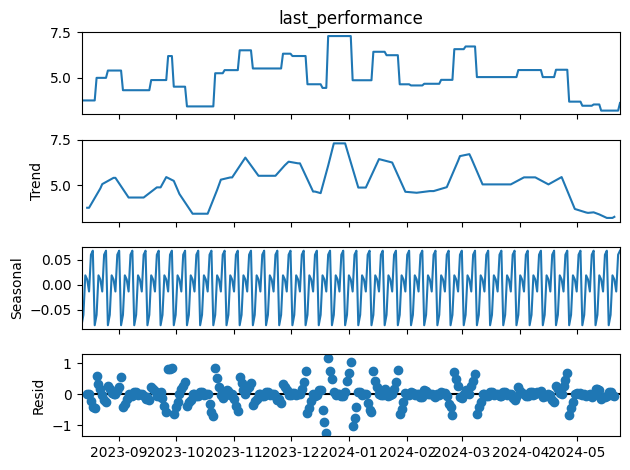

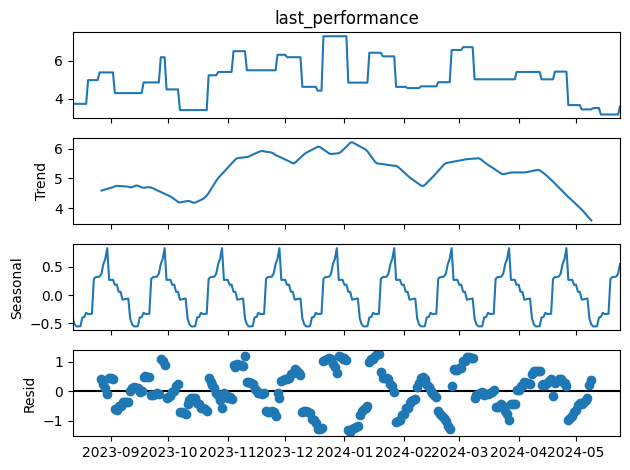

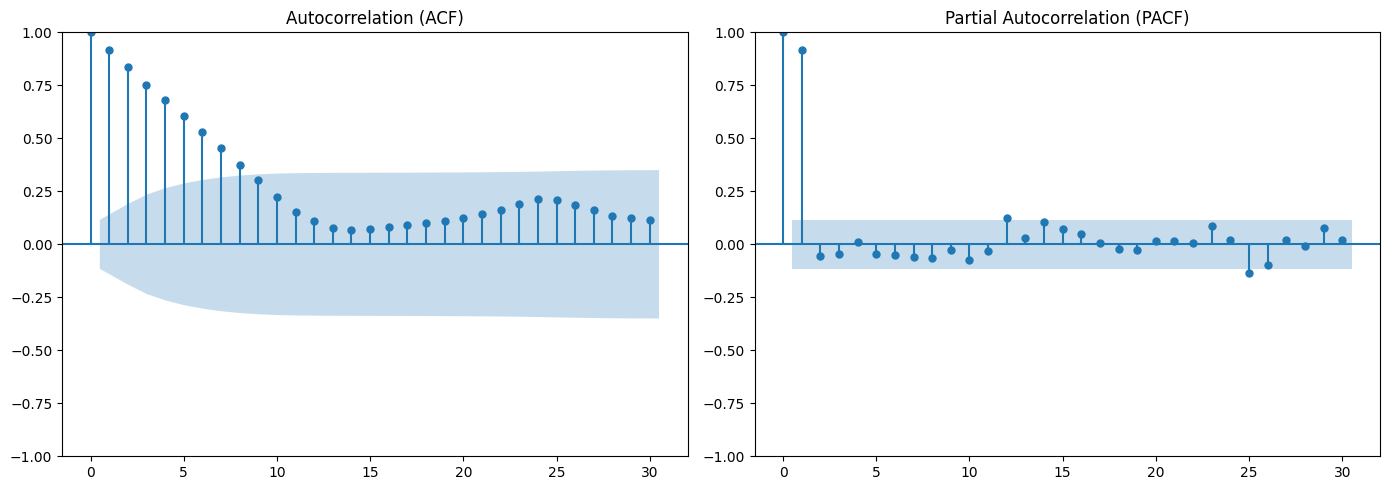

-------------------Mikel Merino-------------------


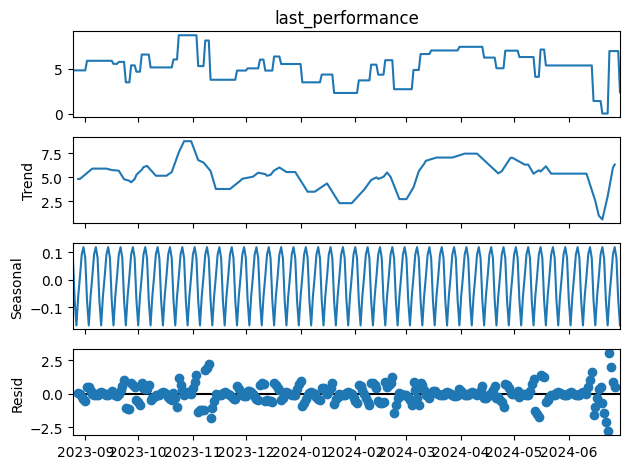

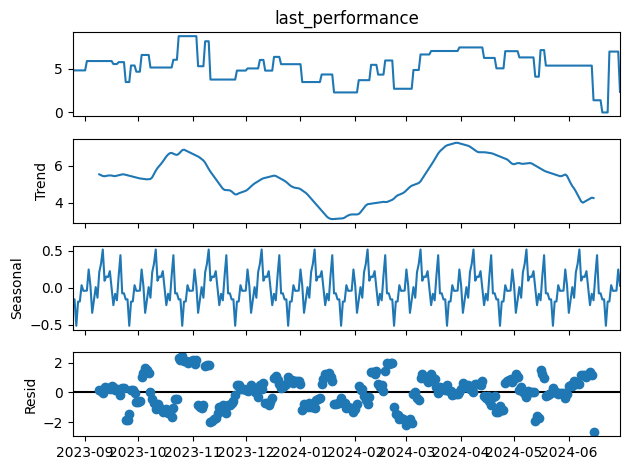

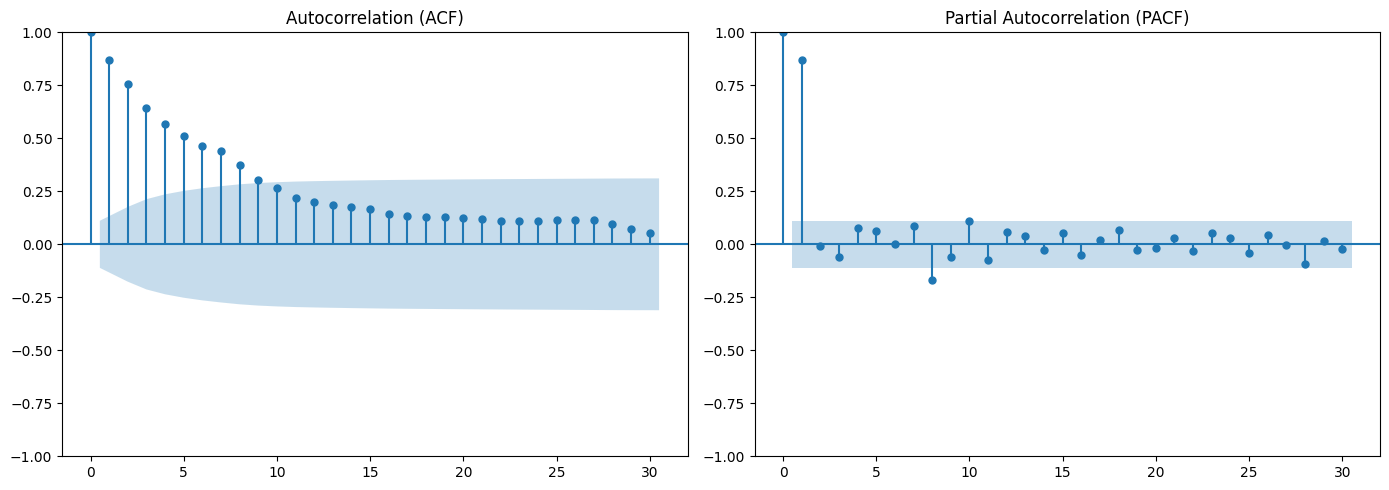

-------------------Morata-------------------


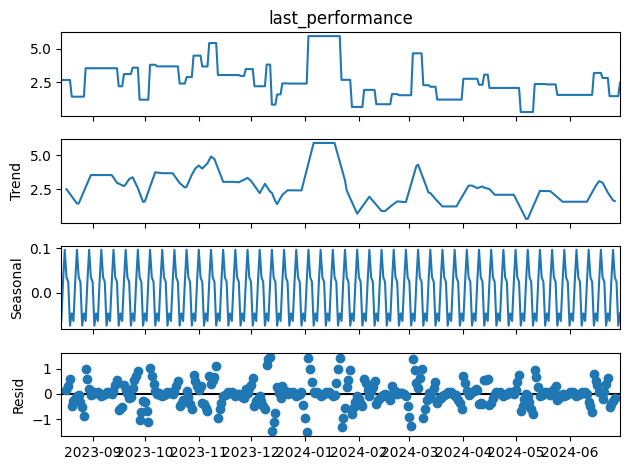

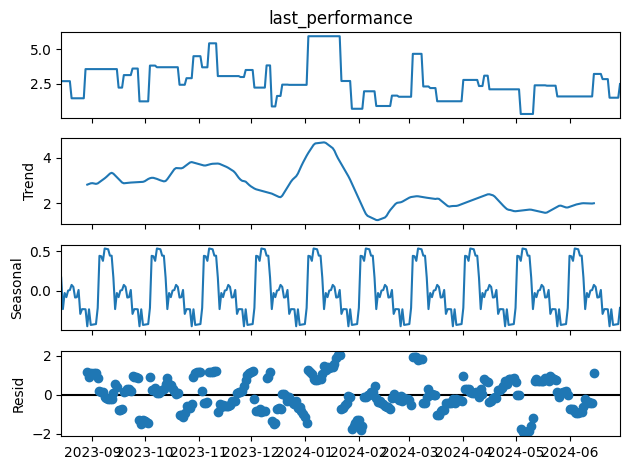

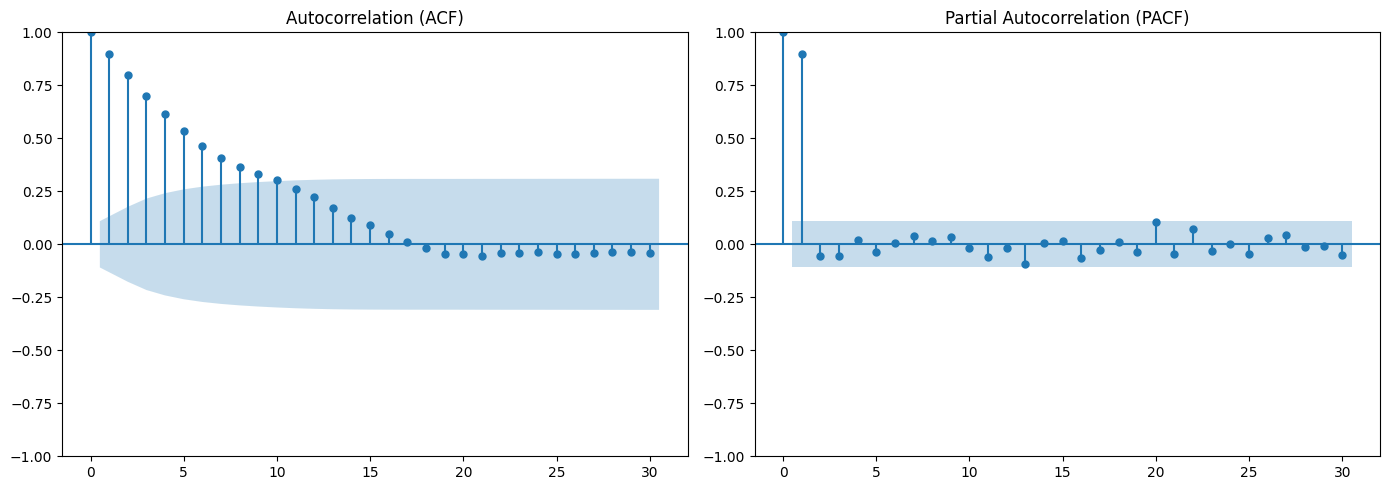

-------------------Nico Williams-------------------


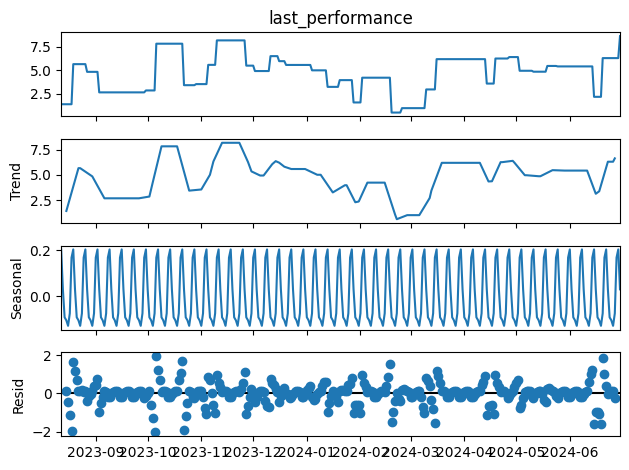

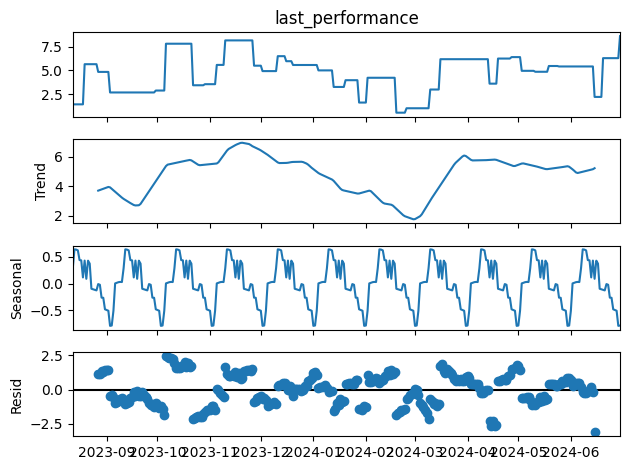

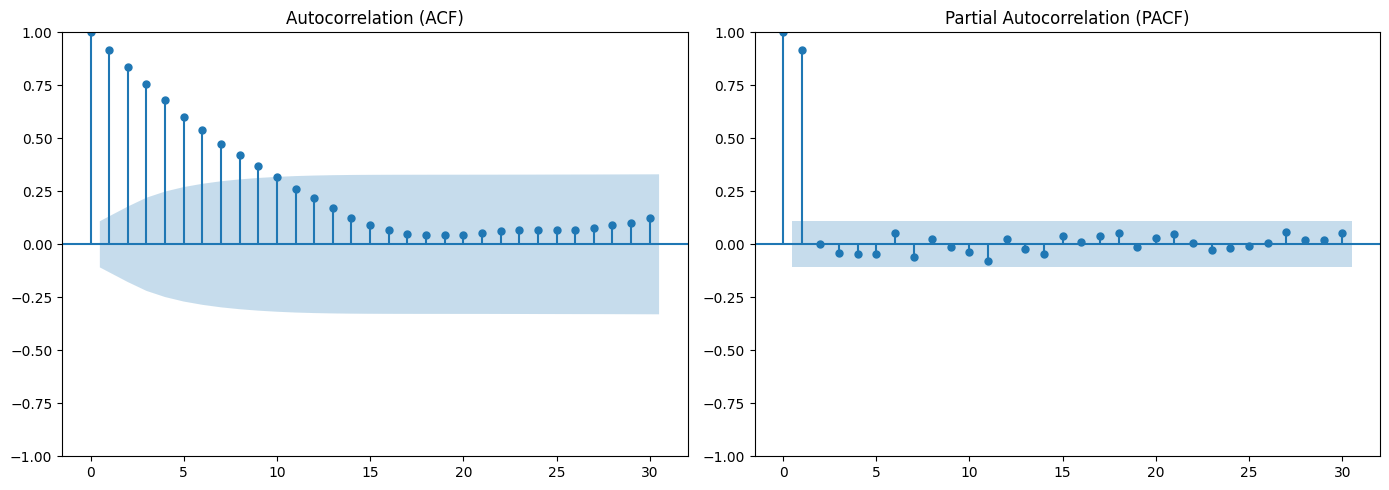

-------------------Oscar Mingueza-------------------


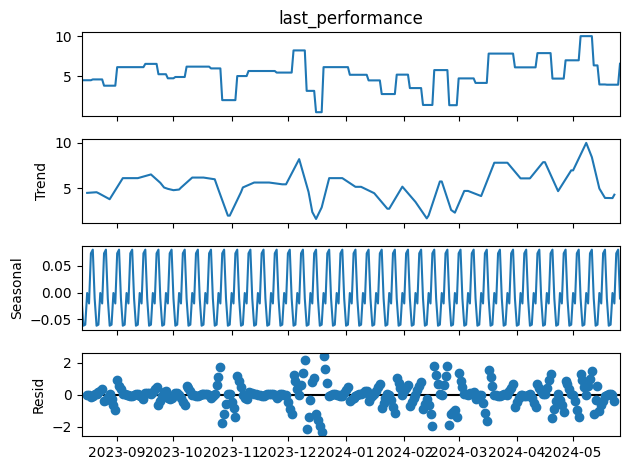

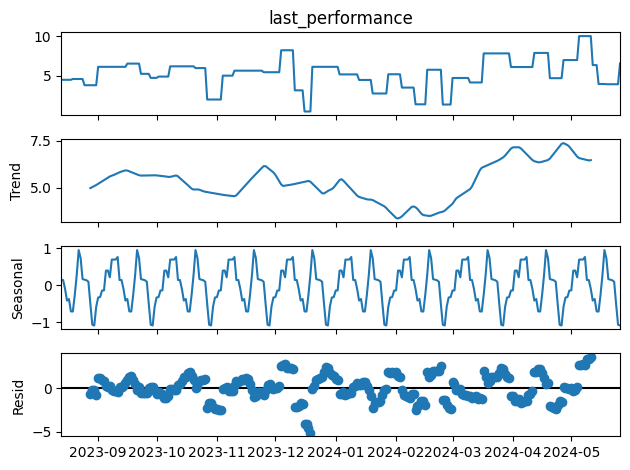

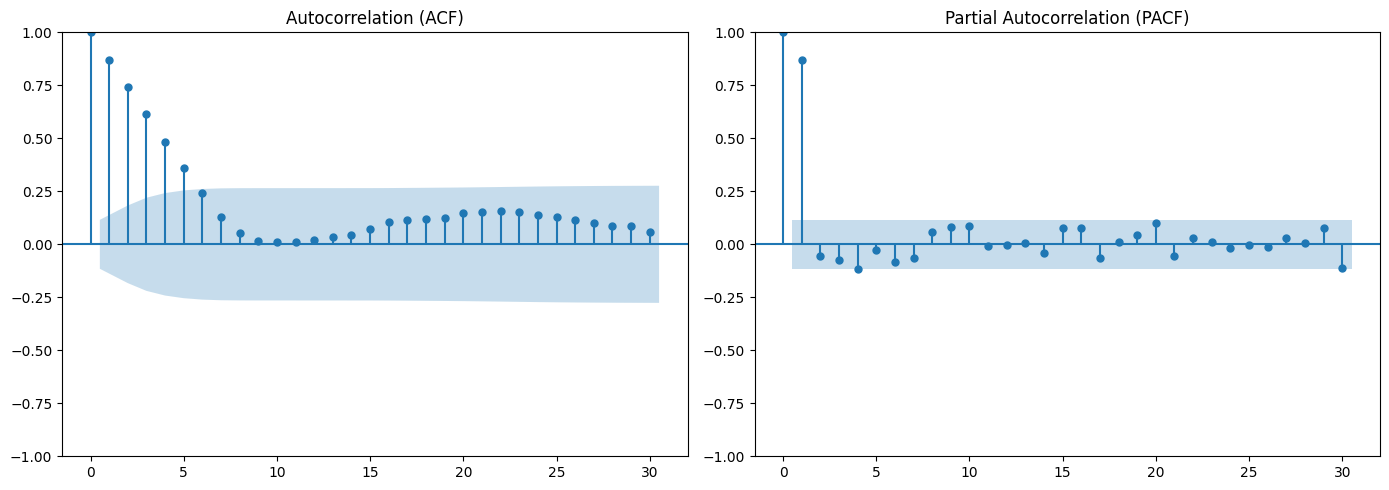

-------------------Vinicius-------------------


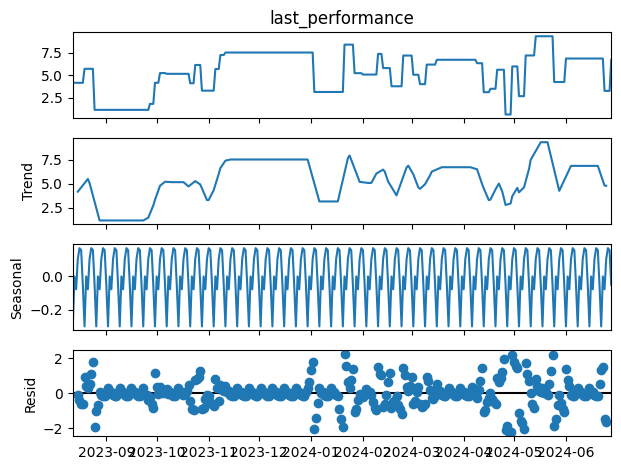

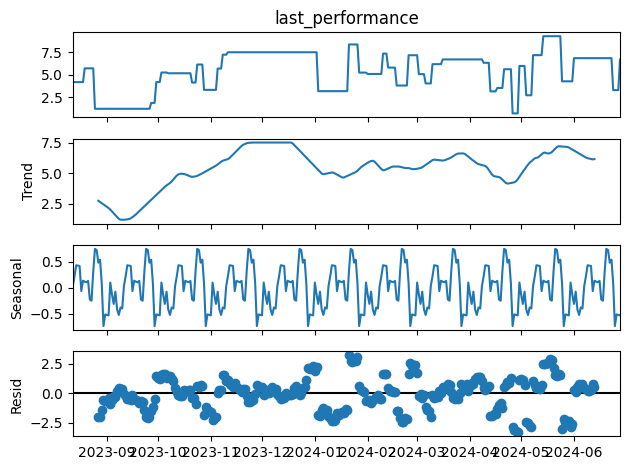

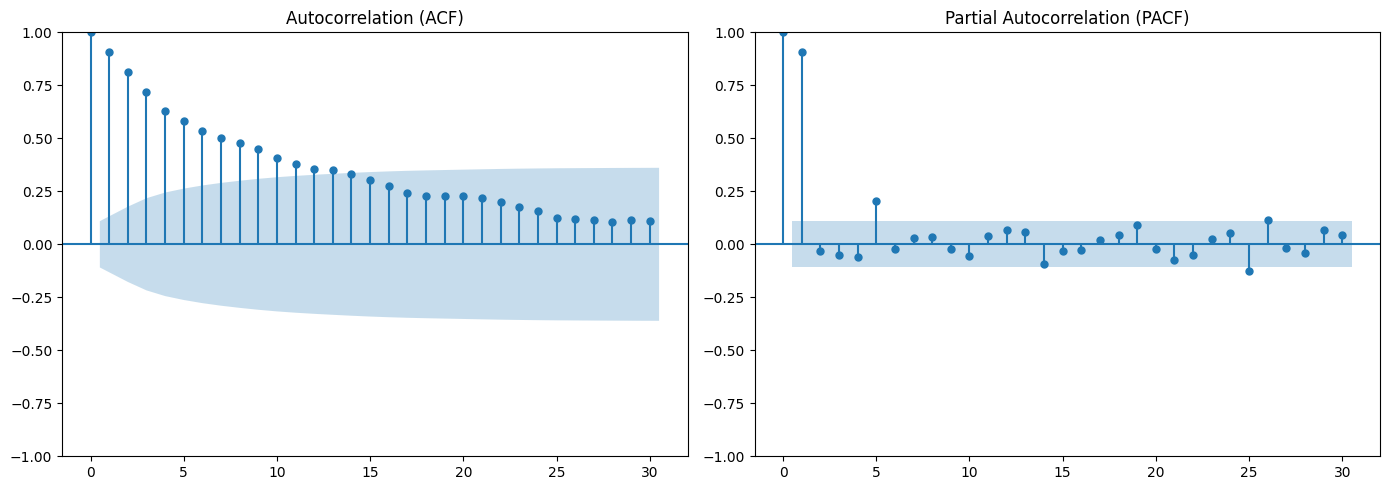

In [76]:
for player in df["Player"].unique():
    print(f'-------------------{player}-------------------')
    decomposition_with_acf_pacf(player)


Ferran


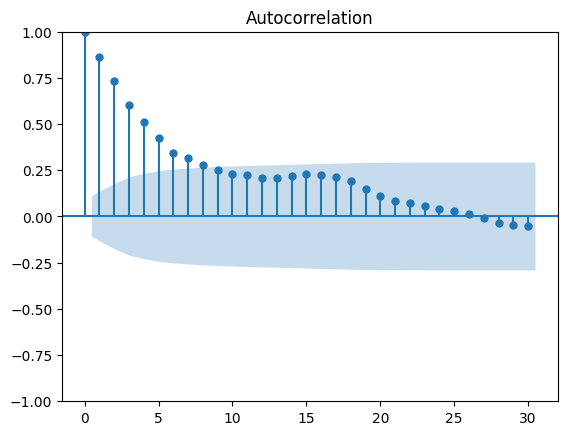

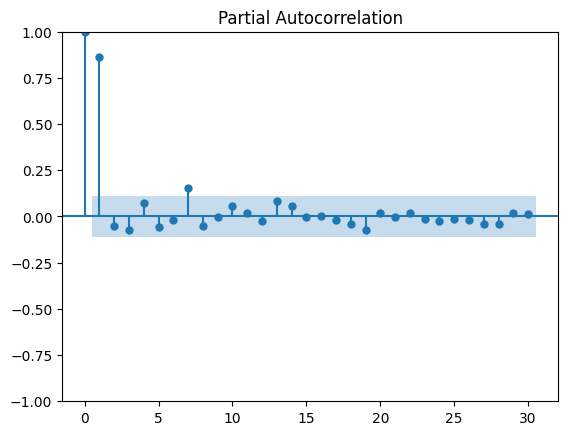

Gerard Moreno


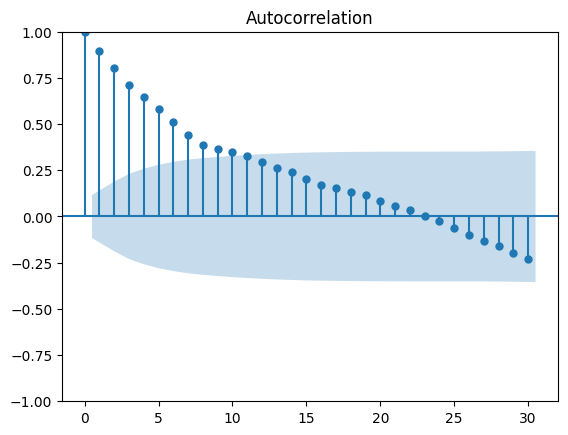

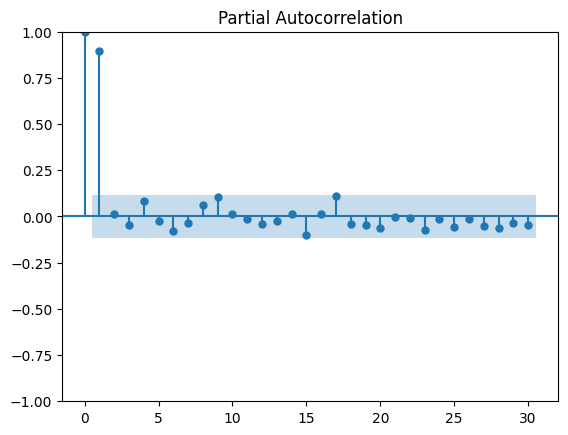

Griezmann


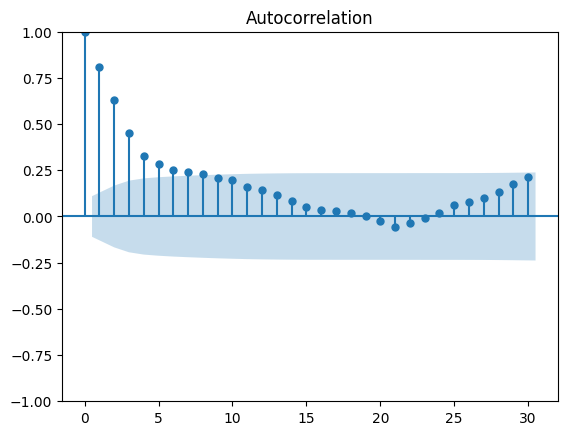

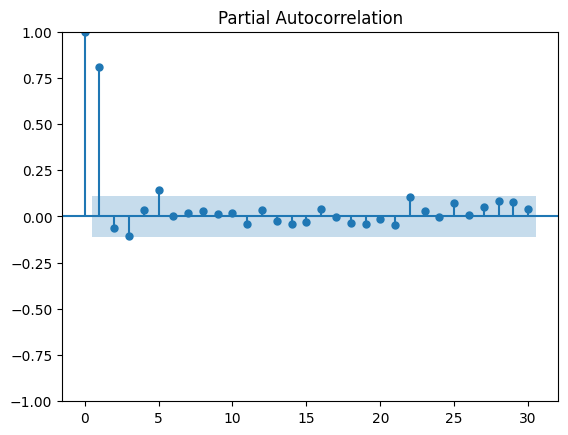

Koundé


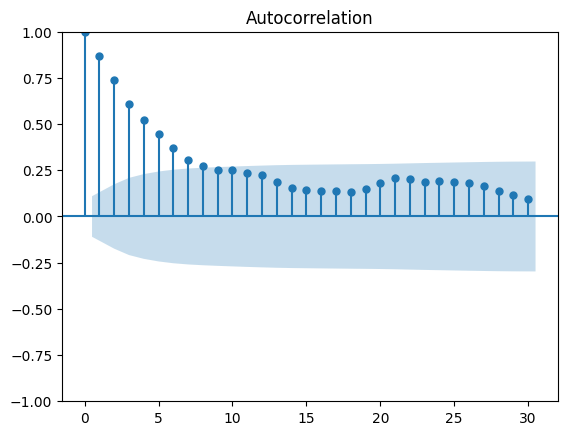

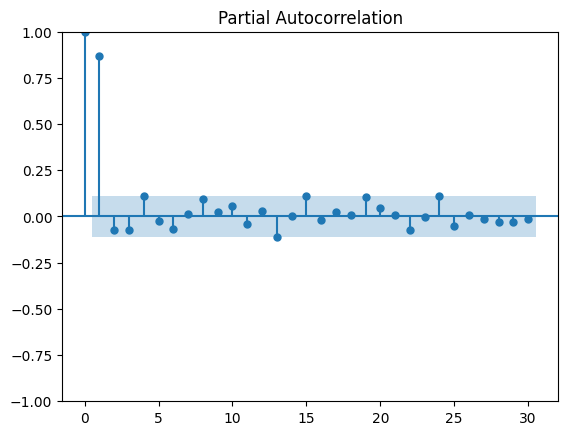

Kubo


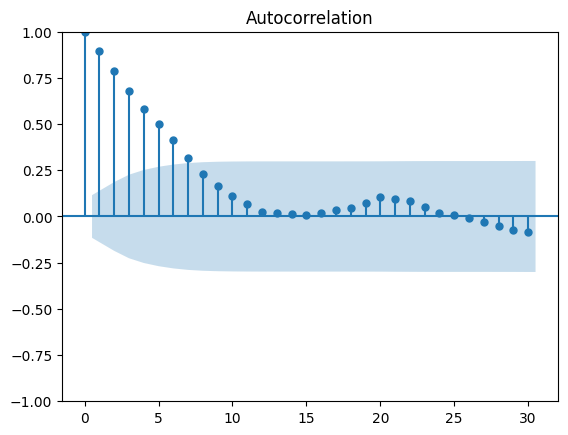

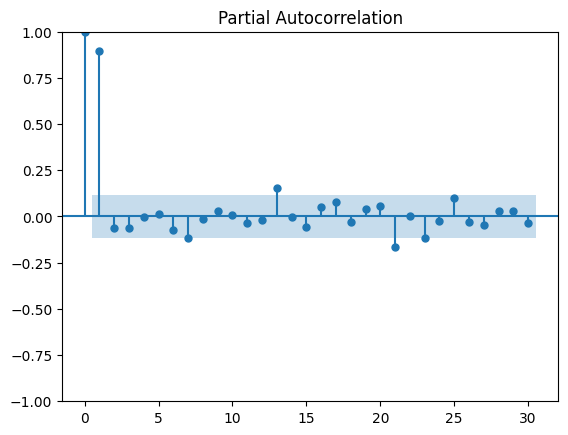

Lamine Yamal


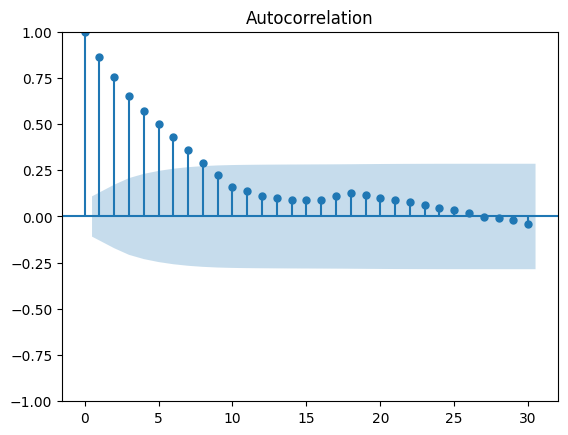

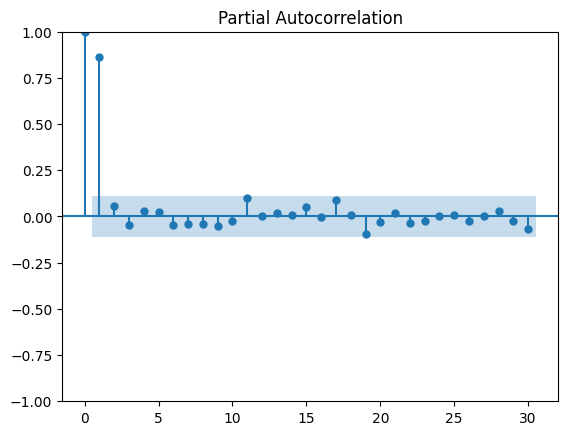

Lewandowski


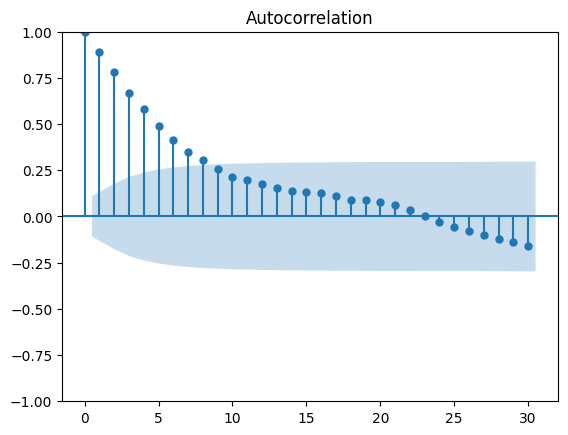

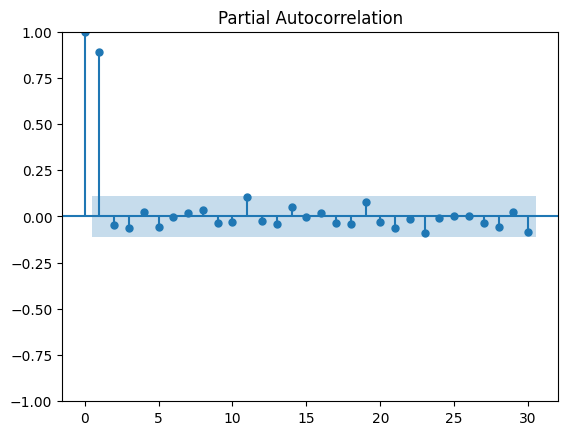

Miguel Gutiérrez


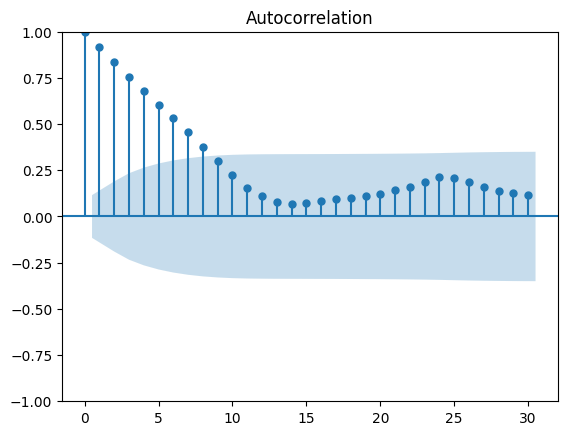

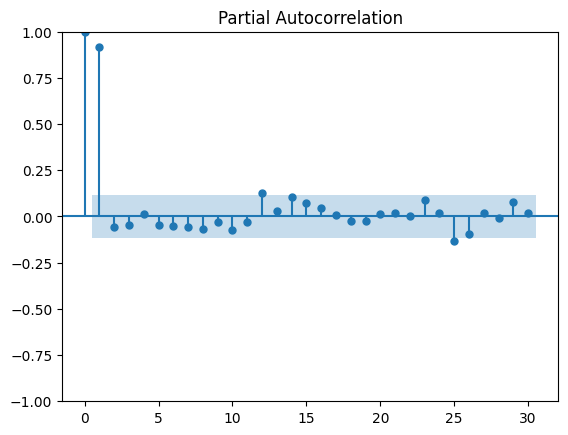

Mikel Merino


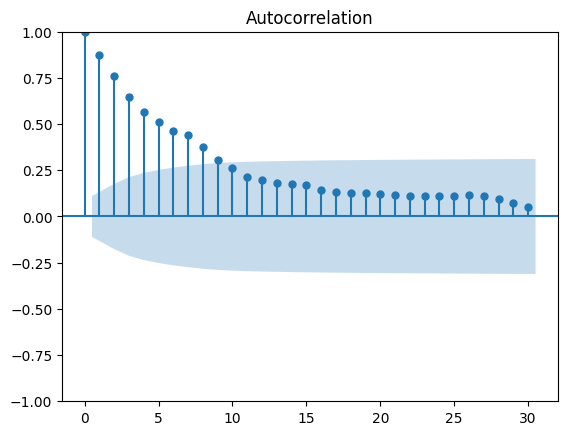

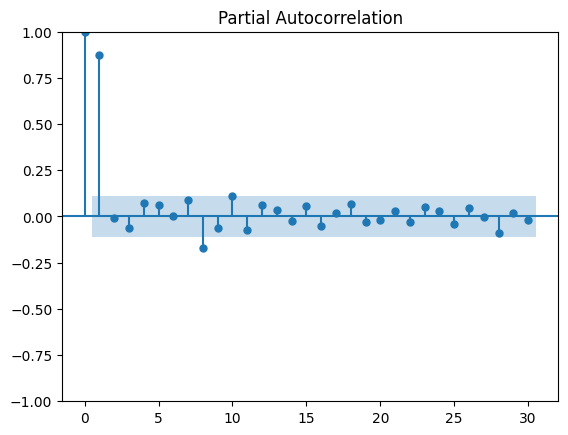

Morata


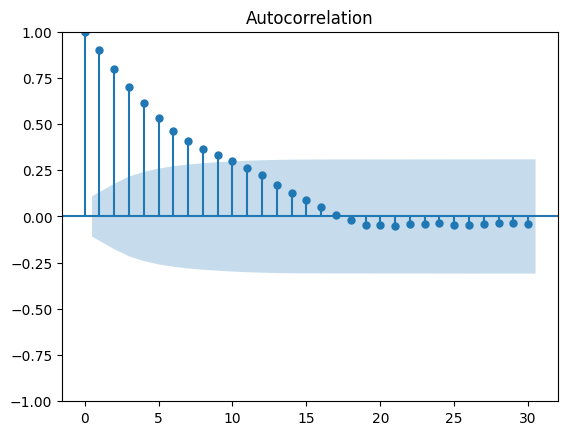

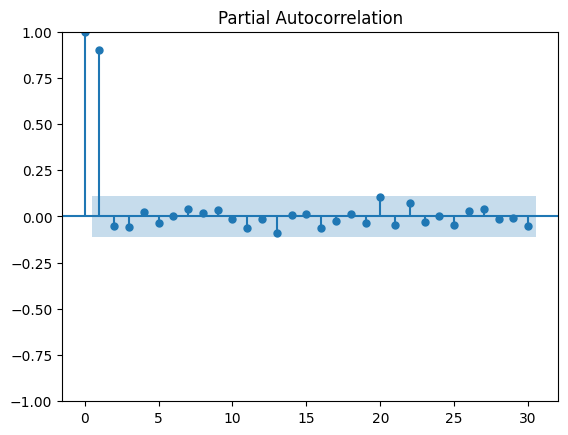

Nico Williams


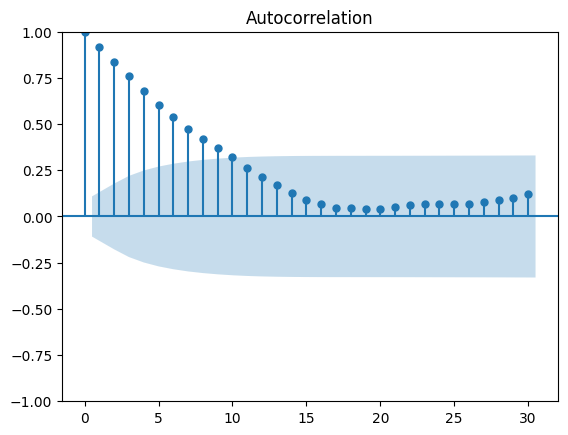

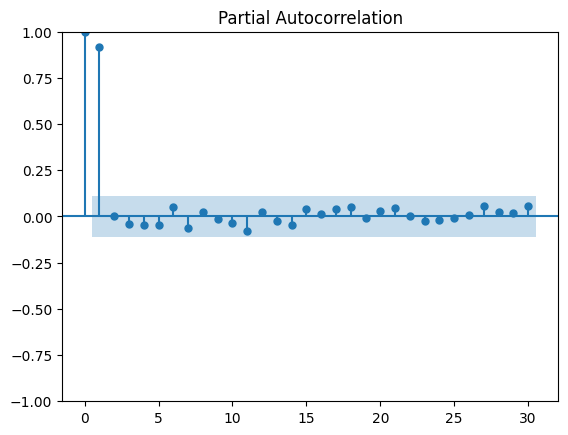

Oscar Mingueza


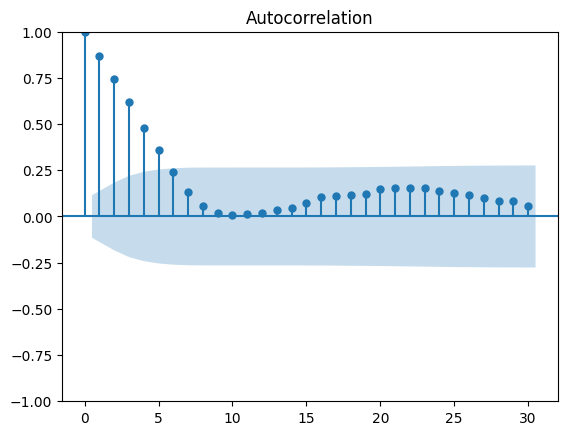

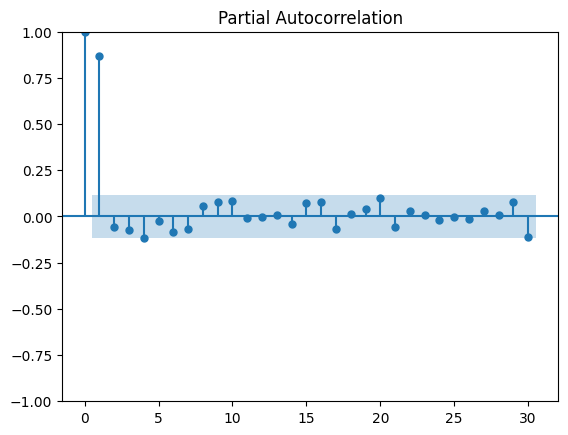

Vinicius


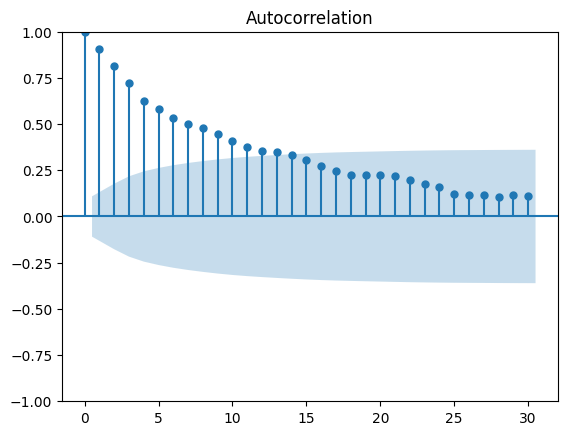

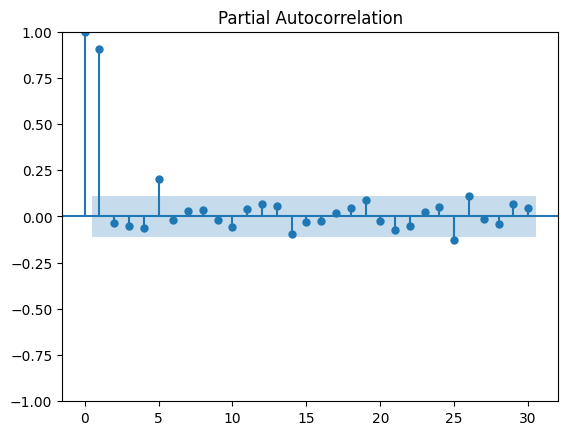

In [77]:
for player in df["Player"].unique():
    print(player)
    acf_pacf(player)